In [71]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [72]:
caminho = 'tabela_imigrantes.xlsx'
tabela_original = pd.read_excel(caminho)
tabela_original

,data_entrada_brasil,data_cadastro,dif_dtcad_dtingr_meses,sexo,fx_etaria,pais_origem,distrito_moradia,condicoes_moradia,cidade_ingresso,cor_raca,escolaridade,situacao_migratoria,fonte_renda,sabendo_crai,demanda_1
0,2012-09-09 00:00:00,2016-05-27 14:23:24.160,44,Masculino,Maiores de 60 anos,Afeganistão,Liberdade,Aluguel ou pensão,Não informado,Amarela,Ensino superior incompleto,Visto permanente,Não informado,Não informado,Documentos
1,2015-06-16 00:00:00,2017-05-31 12:42:03.000,23,Masculino,18 a 29 anos,Afeganistão,Brás,Aluguel ou pensão,Foz do Iguaçu,Branca,Ensino superior incompleto,Solicitante de refúgio,Trabalhador informal ou ambulante,Serviço público,Regularização migratória
2,2010-03-05 00:00:00,2018-03-19 17:33:35.000,96,Masculino,18 a 29 anos,Afeganistão,Pari,Aluguel ou pensão,Guarulhos,Branca,Ensino fundamental incompleto,Visto permanente,"Empresário (MEI, dono de loja, restaurante, etc.)",Instituições ou organizações,Regularização migratória
3,2012-07-25 00:00:00,2018-11-27 15:39:34.004,76,Masculino,18 a 29 anos,Afeganistão,Outro Município,Casa de parente ou amigo,Guarulhos,Branca,Ensino superior incompleto,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Reinserção no mercado de trabalho
4,2008-10-10 00:00:00,2019-01-10 12:50:49.779,123,Masculino,40 a 49 anos,Afeganistão,Brás,Casa de parente ou amigo,Guarulhos,Branca,Não frequentou escola,Visto permanente,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11829,2017-03-11 00:00:00,2017-04-26 15:03:09.000,1,Feminino,40 a 49 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Ensino fundamental completo,Indocumentado/ Irregular,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
11830,2017-03-11 00:00:00,2017-04-26 15:08:10.000,1,Masculino,18 a 29 anos,Vietnã,Cambuci,Casa de parente ou amigo,Guarulhos,Amarela,Ensino médio completo,Indocumentado/ Irregular,Trabalhador informal ou ambulante,Amigos ou parentes,Regularização migratória
11831,2011-05-07 00:00:00,2016-01-27 00:00:00.000,56,Feminino,50 a 59 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Ensino superior completo,Outros,Não informado,Não informado,Não informado
11832,2011-05-14 00:00:00,2016-10-28 14:35:00.352,65,Feminino,Maiores de 60 anos,Zâmbia,Liberdade,Aluguel ou pensão,Não informado,Preta,Ensino médio completo,Outros,Não informado,Não informado,Vaga em Centro de Acolhida


In [73]:
tabela_original['data_entrada_brasil'] = pd.to_datetime(tabela_original['data_entrada_brasil'], errors='coerce')

#remover linhas onde a data não pôde ser reconhecida porque tava dando erro na hr de selecionar so acima do ano 2000
tabela_nova = tabela_original.dropna(subset=['data_entrada_brasil'])

# Remover todas as linhas em que o ano da coluna 'data_entrada_brasil' seja menor do que 2000
tabela_nova = tabela_nova.loc[tabela_nova['data_entrada_brasil'].dt.year >= 2000]

len(tabela_nova)

11153

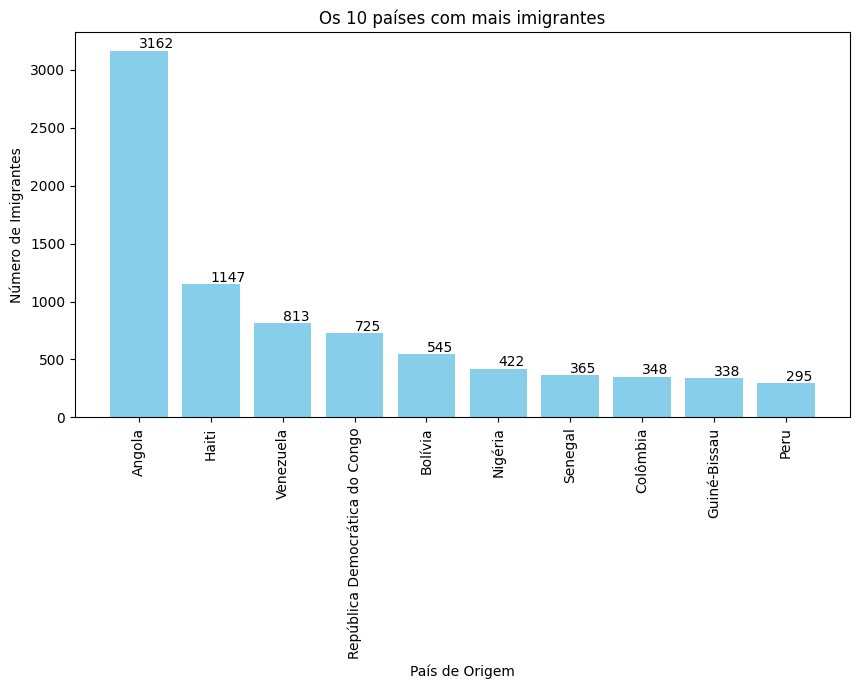

In [74]:
import matplotlib.pyplot as plt

# Contar o número de imigrantes de cada país
contagem_paises = tabela_nova['pais_origem'].value_counts()

# Selecionar os 10 países com mais imigrantes
dez_paises = contagem_paises[:10]

# Criar um gráfico de barras
plt.figure(figsize=(10,5))
bars = plt.bar(dez_paises.index, dez_paises.values, color='skyblue')

# Adicionar a quantidade de imigrantes no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') # va: vertical alignment

plt.title('Os 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')

plt.xticks(rotation=90)

plt.show()


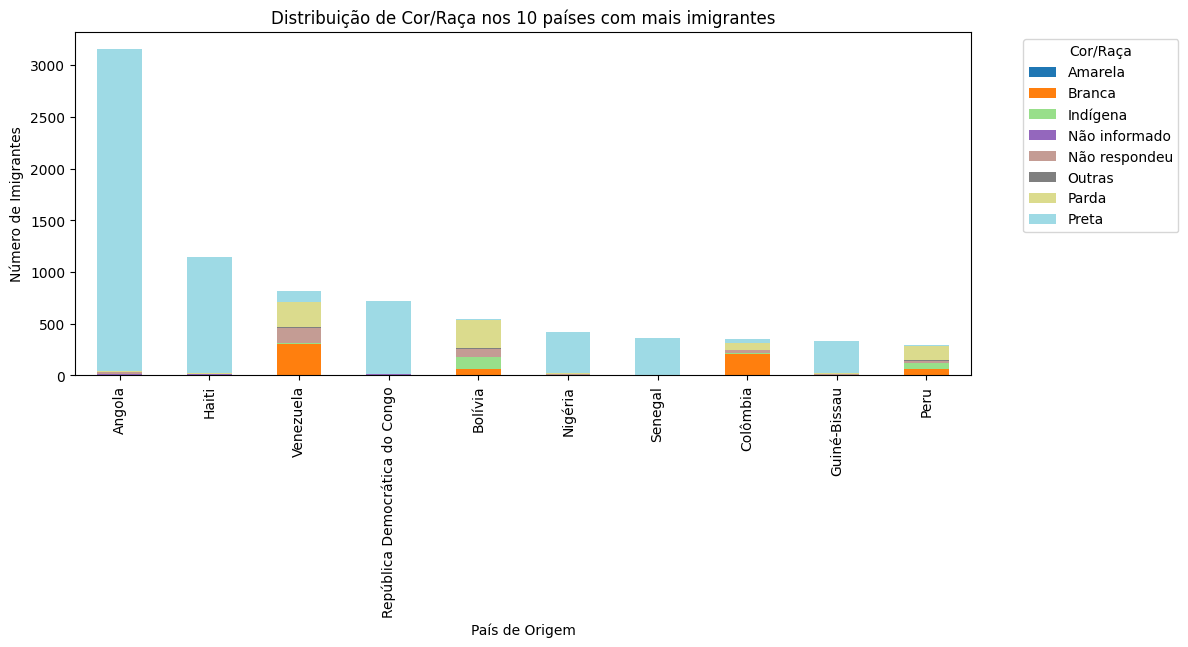

In [75]:
contagem_paises = tabela_nova['pais_origem'].value_counts()

# Seleccionar los 10 países con más inmigrantes
dez_paises = contagem_paises[:10].index

# Filtrar los datos para incluir solo estos 10 países
dados_filtrados = tabela_nova[tabela_nova['pais_origem'].isin(dez_paises)]

# Agrupar por país de origen y color/raza, luego contar los registros
distribuicao_cor_raca = dados_filtrados.groupby(['pais_origem', 'cor_raca']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
distribuicao_cor_raca.loc[dez_paises].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Añadir título y etiquetas
plt.title('Distribuição de Cor/Raça nos 10 países com mais imigrantes')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')
plt.xticks(rotation=45)
plt.legend(title='Cor/Raça', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

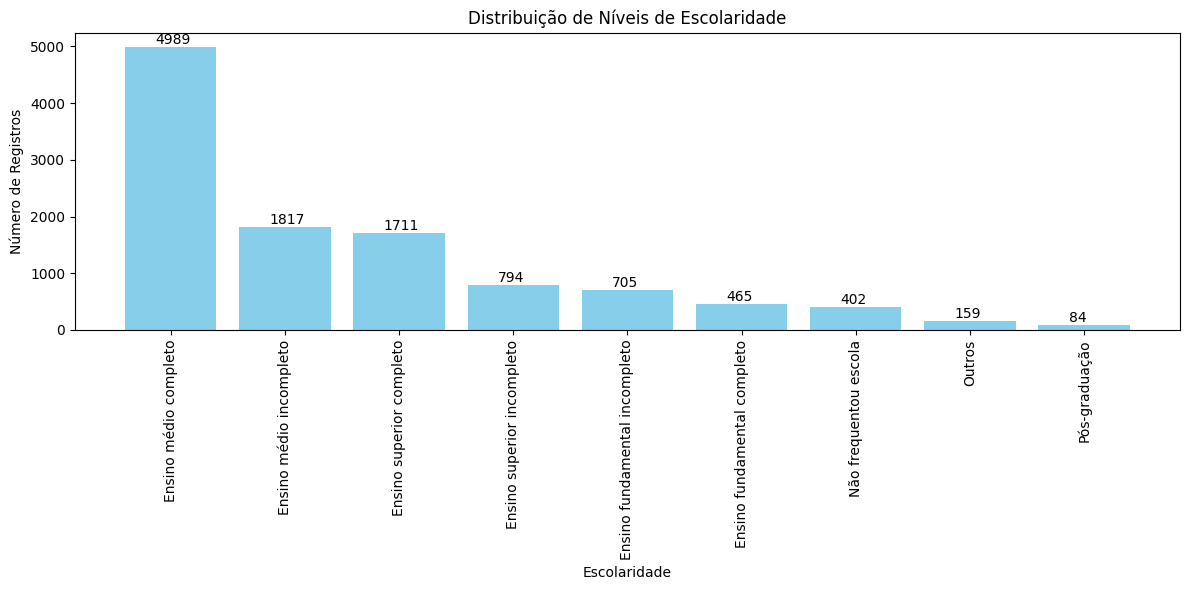

In [76]:
contagem_escolaridade = tabela_nova['escolaridade'].value_counts()

# Ordenar as categorias de escolaridade
ordem_escolaridade = ['Não frequentou escola', 'Ensino fundamental incompleto', 'Ensino fundamental completo',
                      'Ensino médio incompleto', 'Ensino médio completo', 'Ensino superior incompleto',
                      'Ensino superior completo', 'Pós-graduação', 'Outros']

# Garantir que todas as categorias estejam presentes
contagem_escolaridade = contagem_escolaridade.reindex(ordem_escolaridade, fill_value=0)

# Ordenar as contagens de escolaridade pela quantidade
contagem_escolaridade = contagem_escolaridade.sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(contagem_escolaridade.index, contagem_escolaridade.values, color='skyblue')

# Adicionar a quantidade no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval, int(yval), va='bottom')  # va: alinhamento vertical

# Adicionar título e rótulos aos eixos
plt.title('Distribuição de Níveis de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Número de Registros')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [77]:
#Trabalhador informal ou ambulante, 
#Empresário (MEI, dono de loja, restaurante, etc.), 
#Trabalhador autônomo
#Desempregado
#Benefícsempregaios sociais (BPC, Bolsa família, Auxílio aluguel)
#Trabalhador CLT
#Outros
#Não informado, 
#Não se aplica - criança/ adolescente

#Trabalha = #Trabalhador informal ou ambulante, Empresário (MEI, dono de loja, restaurante, etc.), Trabalhador informal ou ambulante, Trabalhador autônomo

#Não tem trabalho = Outros,Não informado, Não se aplica - criança/ adolescente, Desempregado, Benefícios sociais (BPC, Bolsa família, Auxílio aluguel), Desempregado



In [78]:
trabalha = ['Trabalhador informal ou ambulante', 'Empresário (MEI, dono de loja, restaurante, etc.)', 'Trabalhador autônomo', 'Trabalhador CLT']
nao_trabalha = ['Outros', 'Não informado', 'Não se aplica - criança/ adolescente', 'Desempregado', 'Benefícios sociais (BPC, Bolsa família, Auxílio aluguel)', 'Não respondeu']

fonte_de_renda =  tabela_nova[['escolaridade', 'fonte_renda']]
fonte_de_renda['fonte_renda'] = fonte_de_renda['fonte_renda'].replace(trabalha, 'Trabalha')
fonte_de_renda['fonte_renda'] = fonte_de_renda['fonte_renda'].replace(nao_trabalha, 'Não Trabalha')

fonte_de_renda.head()

C:\Users\usuario007\AppData\Local\Temp\ipykernel_2336\2611443432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fonte_de_renda['fonte_renda'] = fonte_de_renda['fonte_renda'].replace(trabalha, 'Trabalha')
C:\Users\usuario007\AppData\Local\Temp\ipykernel_2336\2611443432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fonte_de_renda['fonte_renda'] = fonte_de_renda['fonte_renda'].replace(nao_trabalha, 'Não Trabalha')


,escolaridade,fonte_renda
0,Ensino superior incompleto,Não Trabalha
1,Ensino superior incompleto,Trabalha
2,Ensino fundamental incompleto,Trabalha
3,Ensino superior incompleto,Trabalha
4,Não frequentou escola,Trabalha


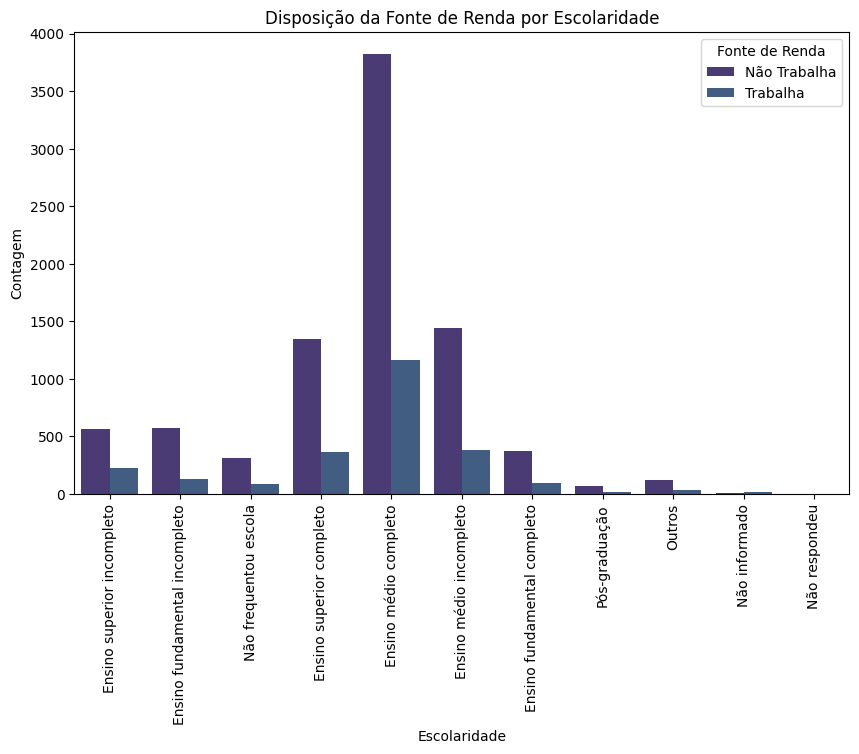

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(data=fonte_de_renda, x='escolaridade', hue='fonte_renda')
plt.title('Disposição da Fonte de Renda por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.legend(title='Fonte de Renda')
plt.show()

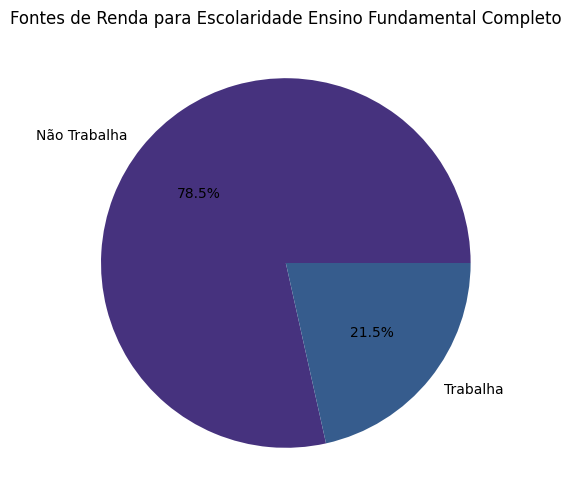

In [80]:
df = fonte_de_renda
df_fundamental_completo = df[df['escolaridade'] == 'Ensino superior completo']

# Contagem de cada fonte de renda
contagem_fonte_renda = df_fundamental_completo['fonte_renda'].value_counts()

# Criação do gráfico de pizza
plt.figure(figsize=(10,6))
plt.pie(contagem_fonte_renda, labels = contagem_fonte_renda.index, autopct='%1.1f%%')
plt.title('Fontes de Renda para Escolaridade Ensino Fundamental Completo')
plt.show()

In [81]:
## Relação de Escolaridade com o Pais de Origem

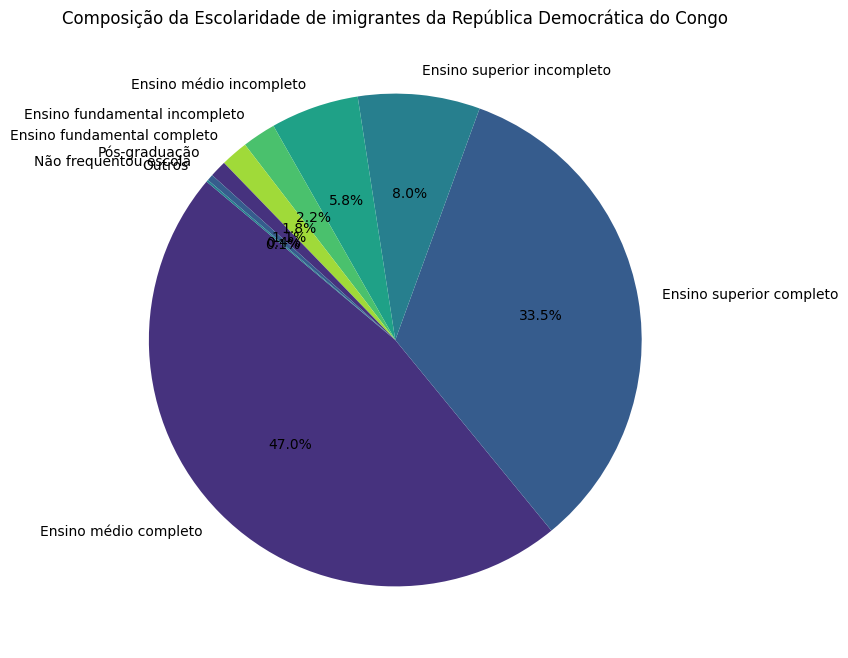

In [82]:
df = tabela_nova[['pais_origem', 'escolaridade']]
angola_df = df[df['pais_origem'] == 'República Democrática do Congo']
escolaridade_counts = angola_df['escolaridade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(escolaridade_counts, labels=escolaridade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composição da Escolaridade de imigrantes da República Democrática do Congo')
plt.show()


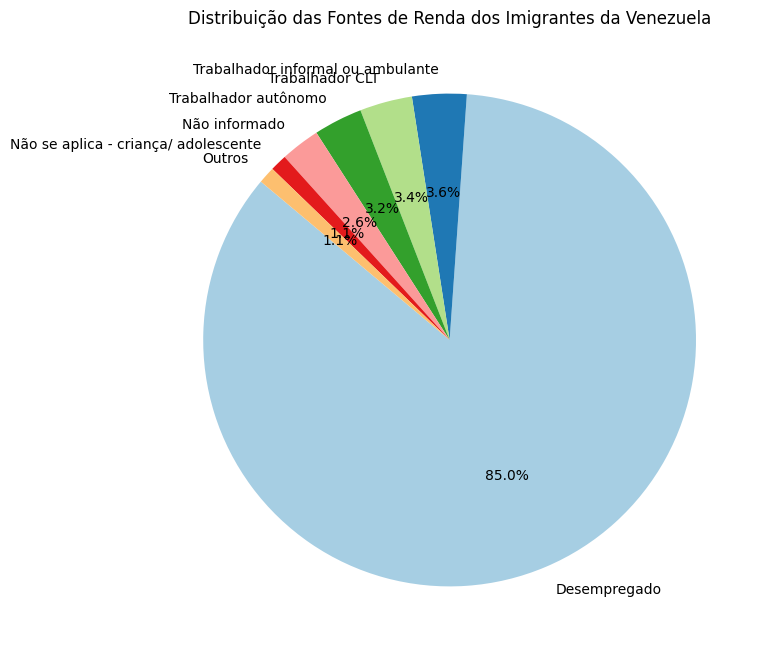

In [83]:
df = tabela_nova

venezuela_df = df[df['pais_origem'] == 'Venezuela']

# Contar a frequência de cada fonte de renda para a Venezuela
fonte_renda_counts = venezuela_df['fonte_renda'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(fonte_renda_counts, labels=fonte_renda_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(fonte_renda_counts))))
plt.title('Distribuição das Fontes de Renda dos Imigrantes da Venezuela')
plt.show()

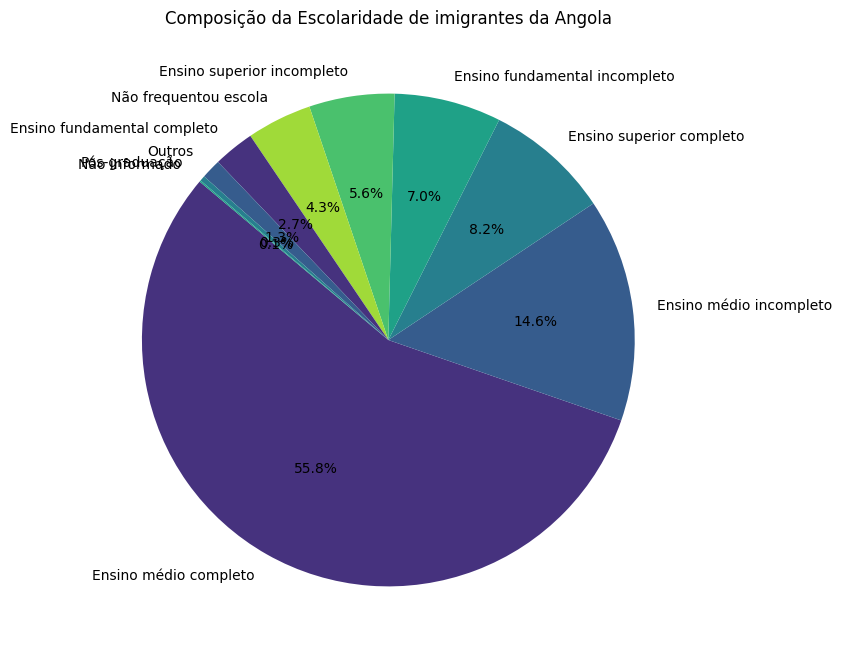

In [84]:
df = tabela_nova[['pais_origem', 'escolaridade']]
angola_df = df[df['pais_origem'] == 'Angola']
escolaridade_counts = angola_df['escolaridade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(escolaridade_counts, labels=escolaridade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composição da Escolaridade de imigrantes da Angola')
plt.show()

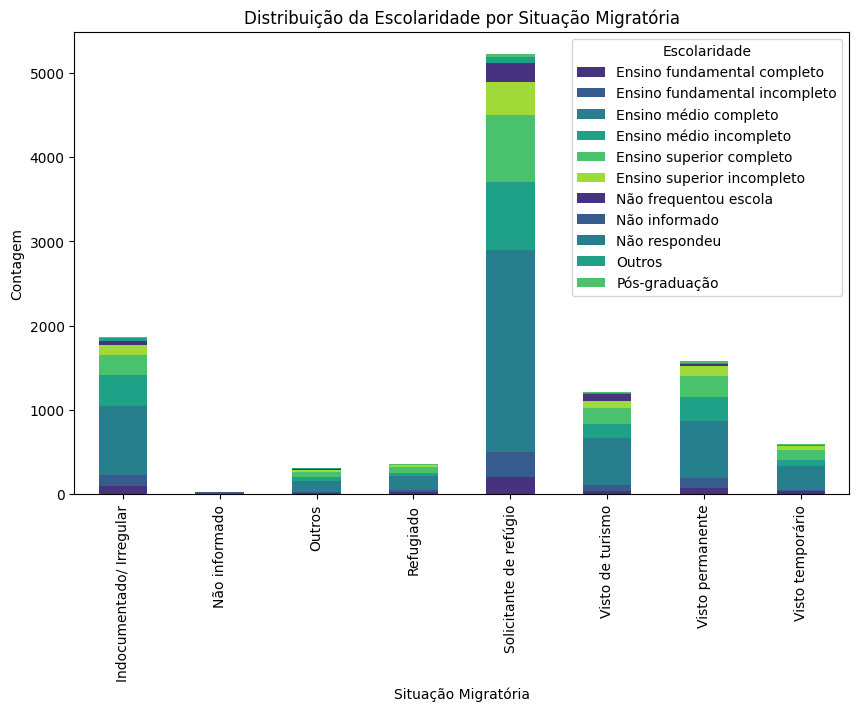

In [85]:
# Contar a frequência de escolaridade por situação migratória
df = tabela_nova

escolaridade_migratoria = df.groupby(['situacao_migratoria', 'escolaridade']).size().unstack()

# Criar o gráfico de barras empilhadas
escolaridade_migratoria.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição da Escolaridade por Situação Migratória')
plt.xlabel('Situação Migratória')
plt.ylabel('Contagem')
plt.legend(title='Escolaridade')
plt.show()

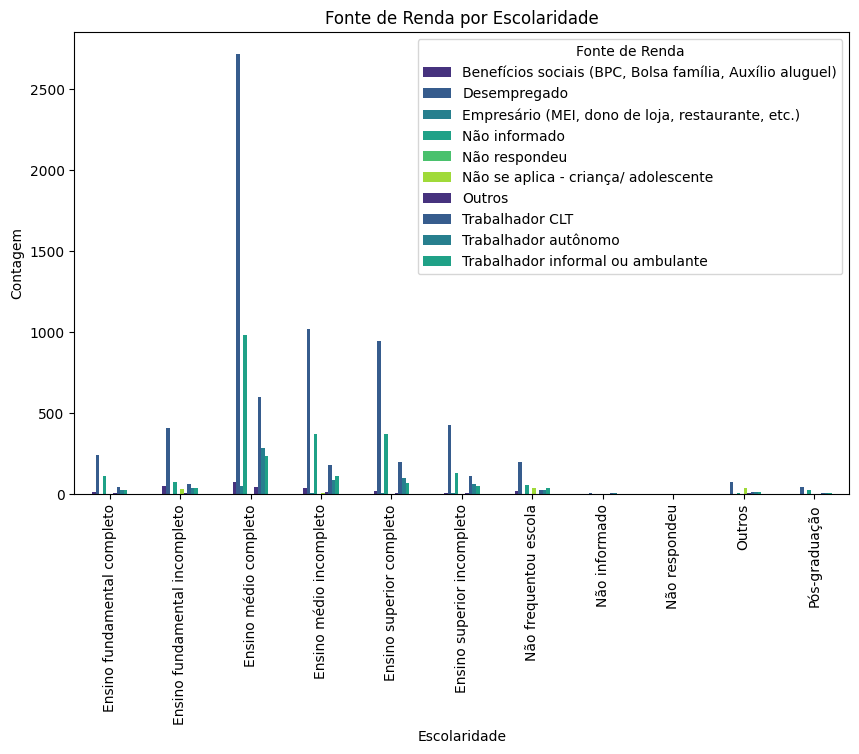

In [86]:
# Contar a frequência de fonte de renda por escolaridade
fonte_renda_escolaridade = df.groupby(['escolaridade', 'fonte_renda']).size().unstack()

# Criar o gráfico de barras
fonte_renda_escolaridade.plot(kind='bar', figsize=(10, 6))
plt.title('Fonte de Renda por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.legend(title='Fonte de Renda')
plt.show()


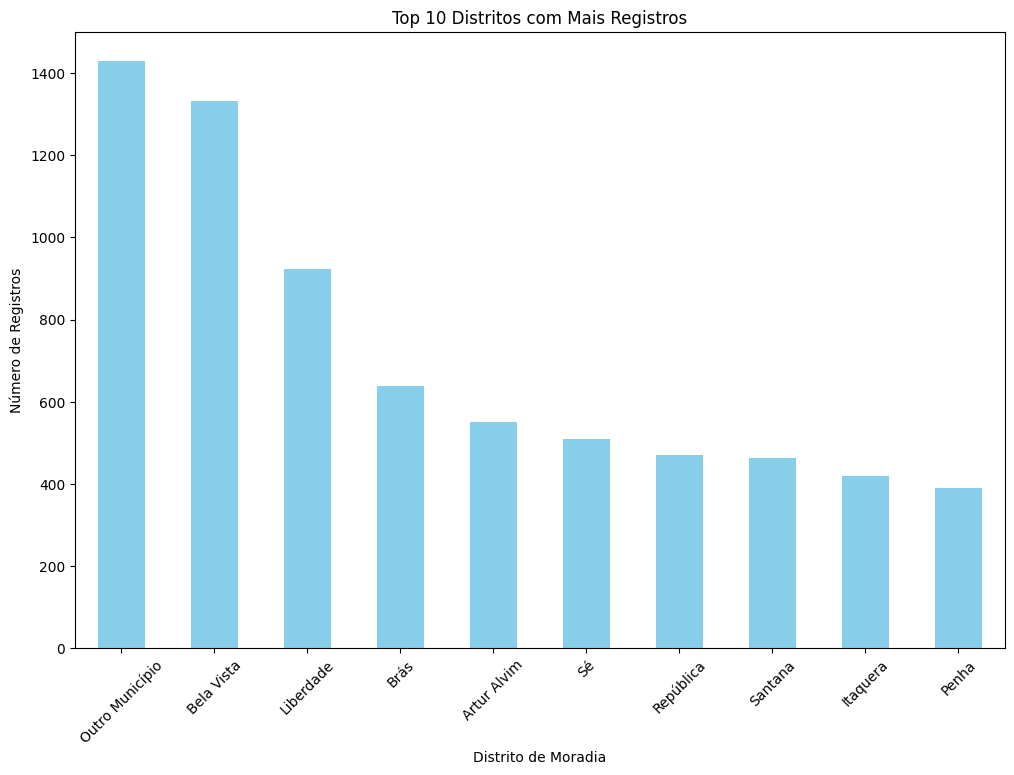

In [87]:
# Contar o número de registros por distrito
distrito_counts = tabela_nova['distrito_moradia'].value_counts()

# Selecionar os 10 distritos com mais registros
top_10_distritos = distrito_counts.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
top_10_distritos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Distritos com Mais Registros')
plt.xlabel('Distrito de Moradia')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.show()

C:\Users\usuario007\AppData\Local\Temp\ipykernel_2336\3002578533.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, total_por_pais[i] + 1, f"{porcentagem_ensino_superior[i]:.1f}%", ha='center')


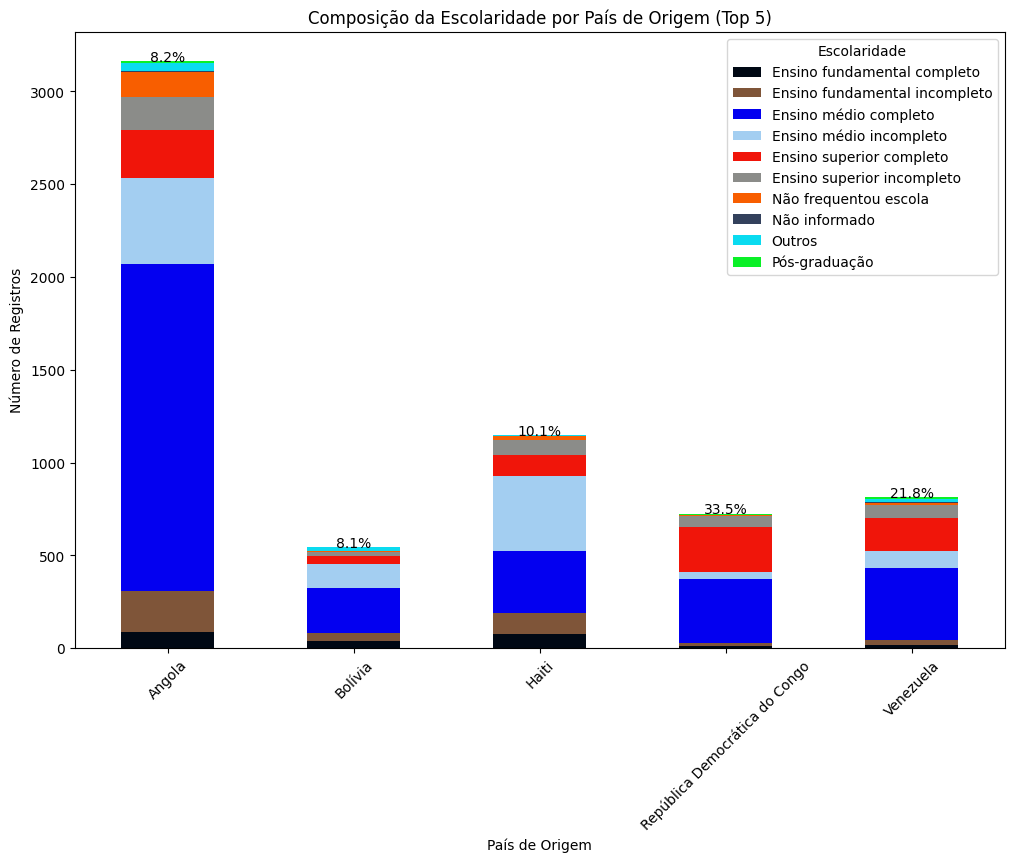

In [88]:
# Contar o número de registros por país de origem
pais_counts = tabela_nova['pais_origem'].value_counts()

# Selecionar os 5 países com mais registros
top_5_paises = pais_counts.head(5).index

# Filtrar os dados para incluir apenas os 5 países selecionados
top_5_df = tabela_nova[tabela_nova['pais_origem'].isin(top_5_paises)]

# Contar a frequência de cada nível de escolaridade dentro desses países
escolaridade_pais = top_5_df.groupby(['pais_origem', 'escolaridade']).size().unstack().fillna(0)

# Calcular a porcentagem de imigrantes com Ensino Superior completo para cada país de origem
total_por_pais = escolaridade_pais.sum(axis=1)
porcentagem_ensino_superior = (escolaridade_pais['Ensino superior completo'] / total_por_pais) * 100

colors = ['#000814', '#7f5539', '#0300F0', '#a3cef1', '#F0150A', '#8b8c89', '#f85e00',
           '#33415c', '#0ADBF0', '#0AF027']

# Criar o gráfico de barras empilhadas
escolaridade_pais.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Composição da Escolaridade por País de Origem (Top 5)')
plt.xlabel('País de Origem')
plt.ylabel('Número de Registros')
plt.legend(title='Escolaridade')
plt.xticks(rotation=45)

# Adicionar os rótulos com as porcentagens no topo de cada barra
for i in range(len(porcentagem_ensino_superior)):
    plt.text(i, total_por_pais[i] + 1, f"{porcentagem_ensino_superior[i]:.1f}%", ha='center')

plt.show()

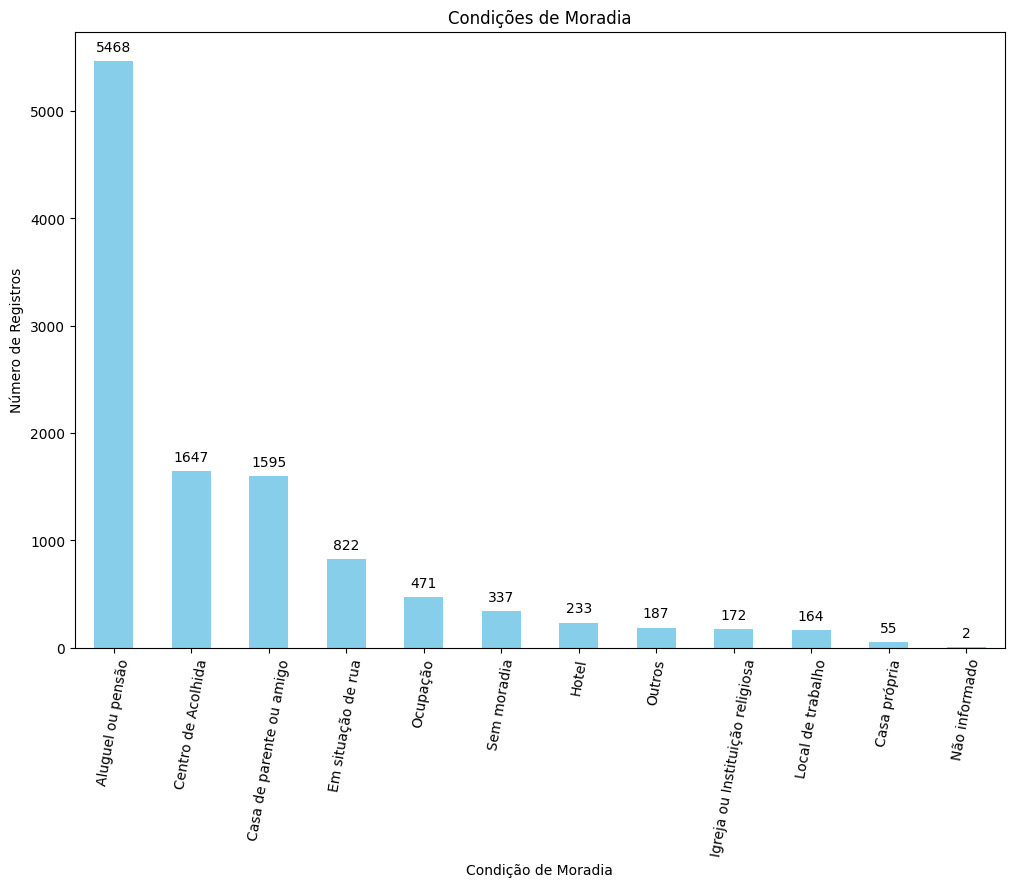

In [89]:
# Contar o número de registros por condição de moradia
moradia = tabela_nova['condicoes_moradia'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = moradia.plot(kind='bar', color='skyblue')

# Adicionar a quantidade no topo de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Definir o título e rótulos dos eixos
plt.title('Condições de Moradia')
plt.xlabel('Condição de Moradia')
plt.ylabel('Número de Registros')
plt.xticks(rotation=80)

# Mostrar o gráfico
plt.show()


## Relação da condição de moradia com os países de origem com mais imigrantes  

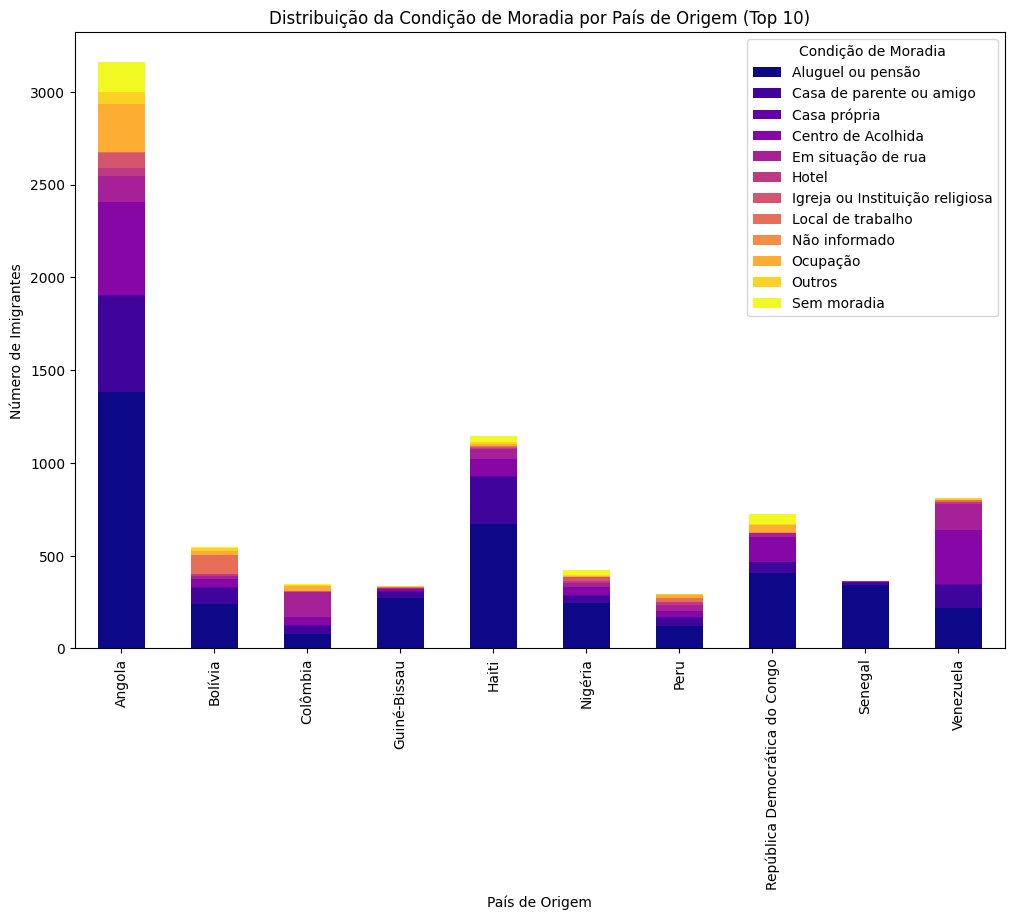

In [90]:
# Contar o número de registros por país de origem
pais_counts = tabela_nova['pais_origem'].value_counts()

# Selecionar os 10 países com mais registros
top_10_paises = pais_counts.head(10).index

# Filtrar os dados para incluir apenas os 10 países selecionados
top_10_df = tabela_nova[tabela_nova['pais_origem'].isin(top_10_paises)]

# Contar a frequência de cada condição de moradia dentro desses países
moradia_pais = top_10_df.groupby(['pais_origem', 'condicoes_moradia']).size().unstack().fillna(0)

# Criar o gráfico de barras empilhadas
moradia_pais.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')
plt.title('Distribuição da Condição de Moradia por País de Origem (Top 10)')
plt.xlabel('País de Origem')
plt.ylabel('Número de Imigrantes')
plt.legend(title='Condição de Moradia')
plt.xticks(rotation=90)
plt.show()

# Gráfico mostra a porcentagem de cada condição de moradia em relação a toda a base de dados

### Grafico de Pizza

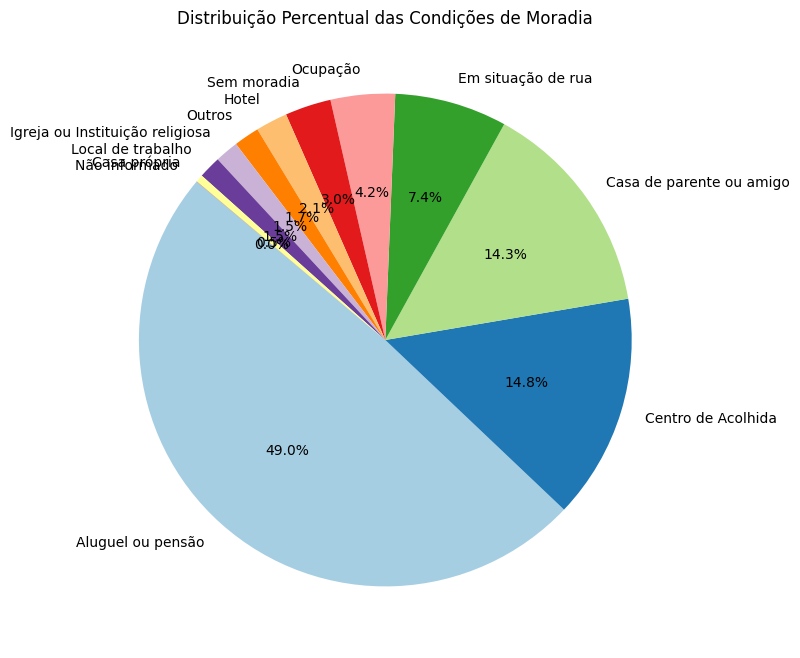

In [91]:
# Contar a frequência de cada condição de moradia
moradia_counts = tabela_nova['condicoes_moradia'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(moradia_counts, labels=moradia_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(moradia_counts))))
plt.title('Distribuição Percentual das Condições de Moradia')
plt.show()


### Gráfico de Frequencia

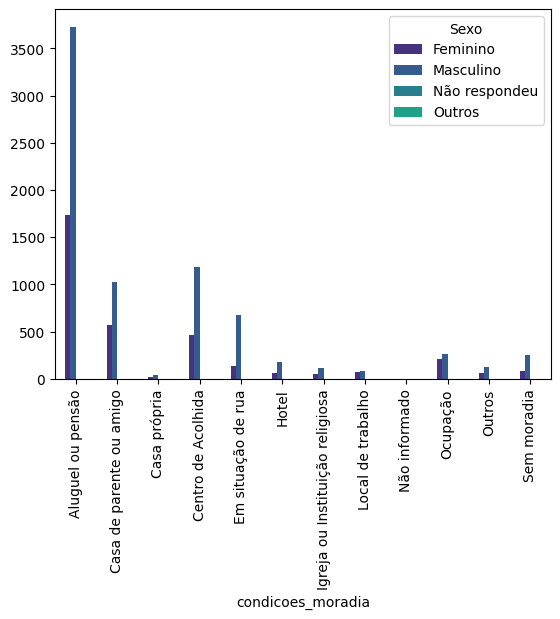

In [92]:
tabela_dupla = pd.crosstab(index=tabela_nova['condicoes_moradia'], columns=tabela_nova['sexo'])

tabela_dupla.plot.bar()

plt.legend(title='Sexo')
plt.show()

In [93]:
tabela_nova['condicoes_moradia'].value_counts()

condicoes_moradia
Aluguel ou pensão                  5468
Centro de Acolhida                 1647
Casa de parente ou amigo           1595
Em situação de rua                  822
Ocupação                            471
Sem moradia                         337
Hotel                               233
Outros                              187
Igreja ou Instituição religiosa     172
Local de trabalho                   164
Casa própria                         55
Não informado                         2
Name: count, dtype: int64

In [94]:
tabela_nova['sexo'].value_counts()/12255

sexo
Masculino        0.626193
Feminino         0.283395
Outros           0.000326
Não respondeu    0.000163
Name: count, dtype: float64

In [95]:
tabela_dupla/12255

sexo,Feminino,Masculino,Não respondeu,Outros
condicoes_moradia,,,,
Aluguel ou pensão,0.141738,0.304202,0.000000,0.000245
Casa de parente ou amigo,0.046430,0.083639,0.000082,0.000000
Casa própria,0.001387,0.003101,0.000000,0.000000
Centro de Acolhida,0.037536,0.096695,0.000082,0.000082
Em situação de rua,0.011506,0.055569,0.000000,0.000000
Hotel,0.004896,0.014117,0.000000,0.000000
Igreja ou Instituição religiosa,0.004243,0.009792,0.000000,0.000000
Local de trabalho,0.006202,0.007181,0.000000,0.000000
Não informado,0.000000,0.000163,0.000000,0.000000


In [96]:
tabela_nova.columns

Index(['data_entrada_brasil', 'data_cadastro', 'dif_dtcad_dtingr_meses',
       'sexo', 'fx_etaria', 'pais_origem', 'distrito_moradia',
       'condicoes_moradia', 'cidade_ingresso', 'cor_raca', 'escolaridade',
       'situacao_migratoria', 'fonte_renda', 'sabendo_crai', 'demanda_1'],
      dtype='object')

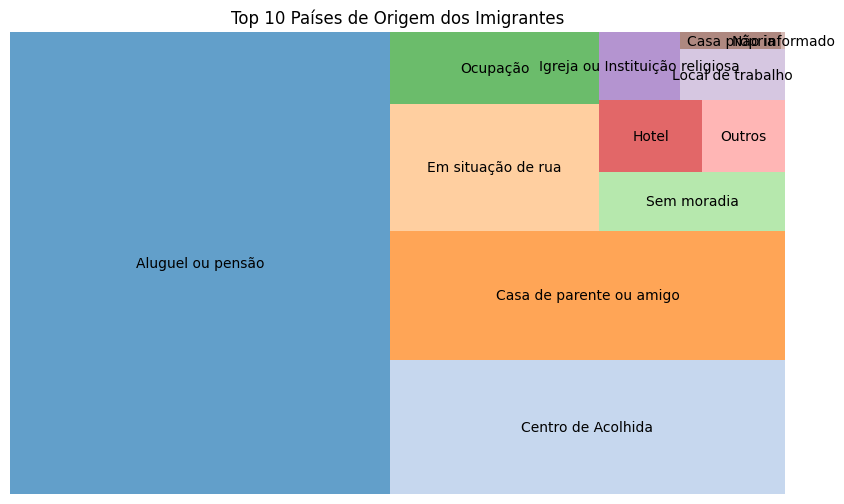

In [97]:
import squarify

# Agrupar os dados por país de origem e contar o número de imigrantes
contagem_condicoes_moradia = tabela_nova['condicoes_moradia'].value_counts()

# Criar uma lista de cores para os retângulos do gráfico de mosaico
cores = plt.cm.tab20.colors

# Plotar o gráfico de mosaico
plt.figure(figsize=(10, 6))
squarify.plot(sizes=contagem_condicoes_moradia.values, label=contagem_condicoes_moradia.index, color=cores, alpha=0.7)
plt.axis('off')
plt.title('Top 10 Países de Origem dos Imigrantes')
plt.show()

In [98]:
df = tabela_nova

# Conta o número total de imigrantes
total_imigrantes = len(df['cor_raca'])

# Conta o número de imigrantes classificados como Preta
imigrantes_pretos = (df['cor_raca'] == 'Preta').sum()

# Calcula a probabilidade
probabilidade_preto = imigrantes_pretos / total_imigrantes

print(f"A probabilidade de um imigrante ser Preto é de {probabilidade_preto:.2%}")

A probabilidade de um imigrante ser Preto é de 68.10%


### Boxplot relacionando diferença de entrada no brasil x Cadastros X Situação migratoria

C:\Users\usuario007\AppData\Local\Temp\ipykernel_2336\181944030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dif_dtcad_dtingr_meses'] = pd.to_numeric(df['dif_dtcad_dtingr_meses'], errors='coerce')
C:\Users\usuario007\AppData\Local\Temp\ipykernel_2336\181944030.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='situacao_migratoria', y='dif_dtcad_dtingr_meses', data=df, palette=cores)


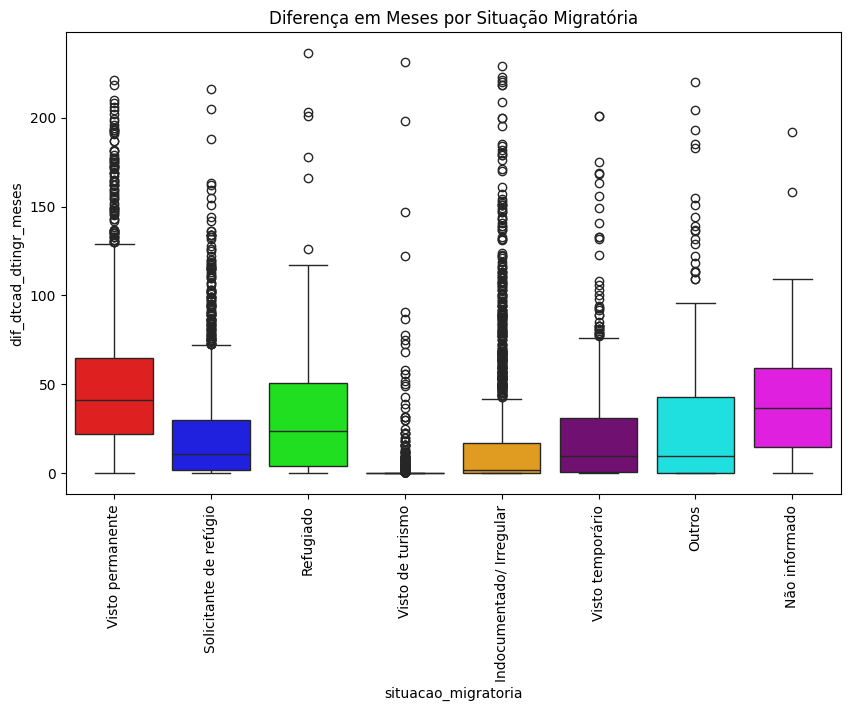

In [104]:
df = tabela_nova[['dif_dtcad_dtingr_meses', 'situacao_migratoria']]
df['dif_dtcad_dtingr_meses'] = pd.to_numeric(df['dif_dtcad_dtingr_meses'], errors='coerce')


cores = ['#FF0000', '#0000FF', '#00FF00','#FFFF00', '#FFA500', '#800080', '#00FFFF', '#FF00FF']


plt.figure(figsize=(10, 6))
sns.boxplot(x='situacao_migratoria', y='dif_dtcad_dtingr_meses', data=df, palette=cores)
plt.title('Diferença em Meses por Situação Migratória')

plt.xticks(rotation=90)

plt.show()

Moda: 0.0, Media: 2.3266832917705735, Mediana: 0.0


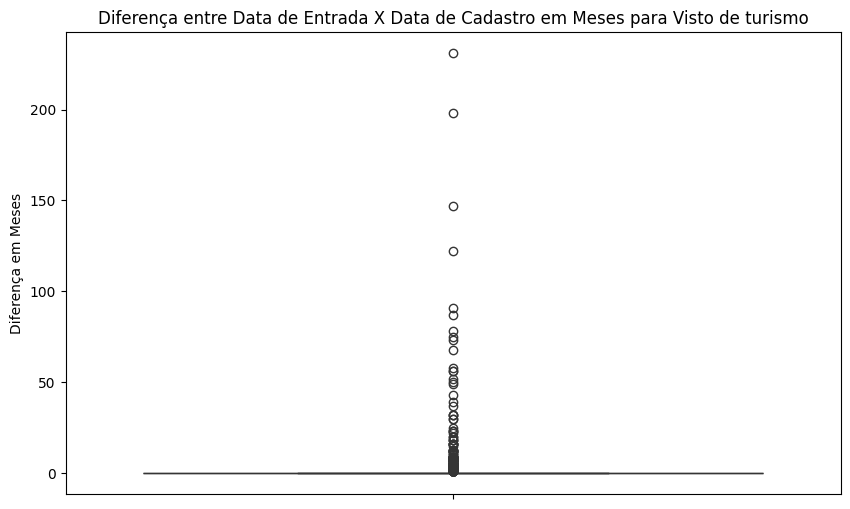

In [105]:
#Boxplot de uma situação migratoria especifica
stiaucao_migratoria = 'Visto de turismo'

df_filtrado = df[df['situacao_migratoria'] == stiaucao_migratoria]

media = df_filtrado['dif_dtcad_dtingr_meses'].mean()
moda = df_filtrado['dif_dtcad_dtingr_meses'].mode()
mediana = df_filtrado['dif_dtcad_dtingr_meses'].median()

print(f'Moda: {moda[0]}, Media: {media}, Mediana: {mediana}')

# Criar a figura para o boxplot
plt.figure(figsize=(10, 6))

# Gerar o boxplot usando seaborn
sns.boxplot(y='dif_dtcad_dtingr_meses', data=df_filtrado)

# Adicionar um título ao gráfico
plt.title(f'Diferença entre Data de Entrada X Data de Cadastro em Meses para {stiaucao_migratoria}')

# Rotular o eixo y
plt.ylabel('Diferença em Meses')

# Mostrar o gráfico
plt.show()

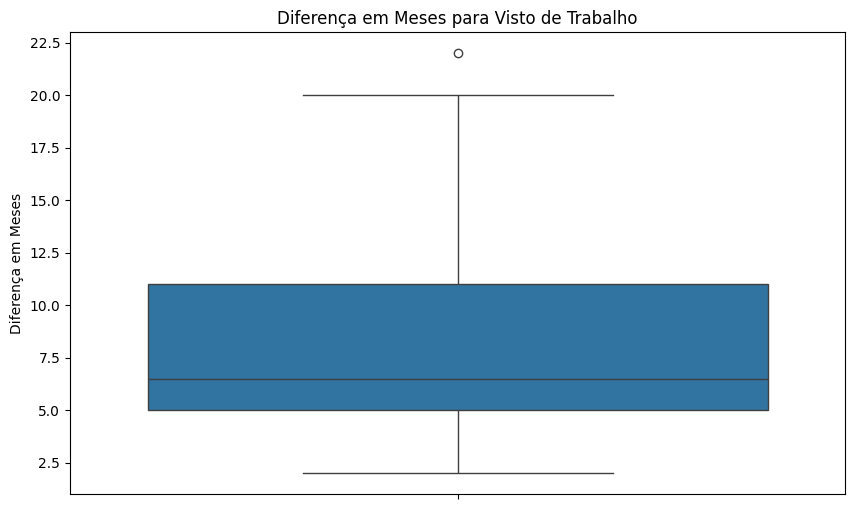

In [38]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
data = {
    'dif_dtcad_dtingr_meses': [2, 4, 5, 5, 6, 7, 8, 12, 20, 22],
    'situacao_migratoria': ['Visto de Trabalho'] * 10
}
df = pd.DataFrame(data)

# Criar a figura para o boxplot
plt.figure(figsize=(10, 6))

# Gerar o boxplot usando seaborn
sns.boxplot(y='dif_dtcad_dtingr_meses', data=df)

# Adicionar um título ao gráfico
plt.title('Diferença em Meses para Visto de Trabalho')

# Rotular o eixo y
plt.ylabel('Diferença em Meses')

# Mostrar o gráfico
plt.show()
